### **Objetivo**

Crear un pequeño framework de visualización genérico que pueda adaptarse fácilmente a nuevas fuentes de datos.

#### **Diagrama**

1. AbstractDataSource (interfaz)

    - Método: get_dataframe() -> pd.DataFrame (abstracto)

    - Como obtener los datos y convertirlos en dataframe.

2. CSVDataSource

    - Método: get_dataframe() → pd.DataFrame

    - Carga el CSV

3. AbstractCleaner (interfaz)

    - Método: clean(dataframe: pd.DataFrame) → pd.DataFrame (abstracto)

    - Aplica la transformación y limpieza.

4. AccidentsCleaner (implementa AbstractCleaner)

    - Contiene la lógica de limpieza e imputación específica del dataset de accidentes.

5. VisualizationStrategy (interfaz)

    - Método: plot(dataframe: pd.DataFrame) (abstracto)

    - Define la interfaz para representr el dataframe en graficos.

6. LineChartStrategy / BarChartStrategy (implementan VisualizationStrategy)

    - Implementan graficas específicas, en este caso lineas y barras.

7. Visualizer

    - set_strategy(strategy: VisualizationStrategy)

    - render(dataframe: pd.DataFrame)

#### **Técnologías usadas**

- Python 3.10+

- Pandas: para manipulación de datos.

- Matplotlib / Seaborn / Plotly: para visualizaciones.

- Jupyter Notebook: entorno de desarrollo y presentación.

- Patrón de diseño: Strategy Pattern, para desacoplar visualización y fuentes de datos.

In [1]:
import pandas as pd
from datasource import CSVDataSource
from cleaner import AccidentsCleaner
from visualizer import Visualizer
from strategies import BarChartStrategy, LineChartStrategy

In [2]:
import sys
sys.path.append('./visualization_framework') 

from datasource import CSVDataSource
from cleaner import AccidentsCleaner
from visualizer import Visualizer
from strategies import BarChartStrategy, LineChartStrategy


In [3]:
# cargar y limpiiar
source = CSVDataSource("US_Accidents_March23.csv")
df = source.get_dataframe()

cleaner = AccidentsCleaner()
df = cleaner.clean(df)


In [4]:
## procesar fecha y hora porque da error por los milisegundos
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour


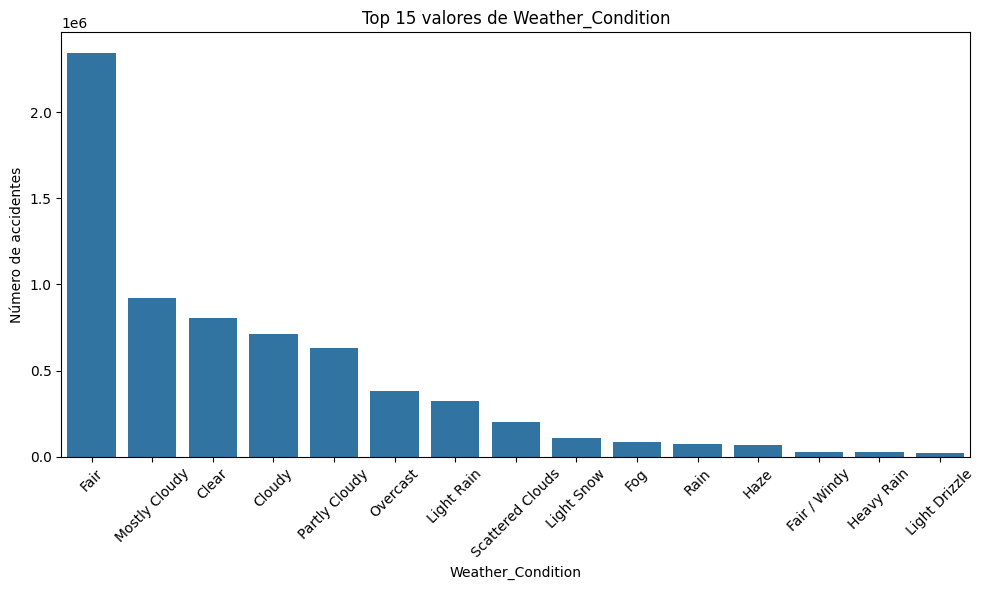

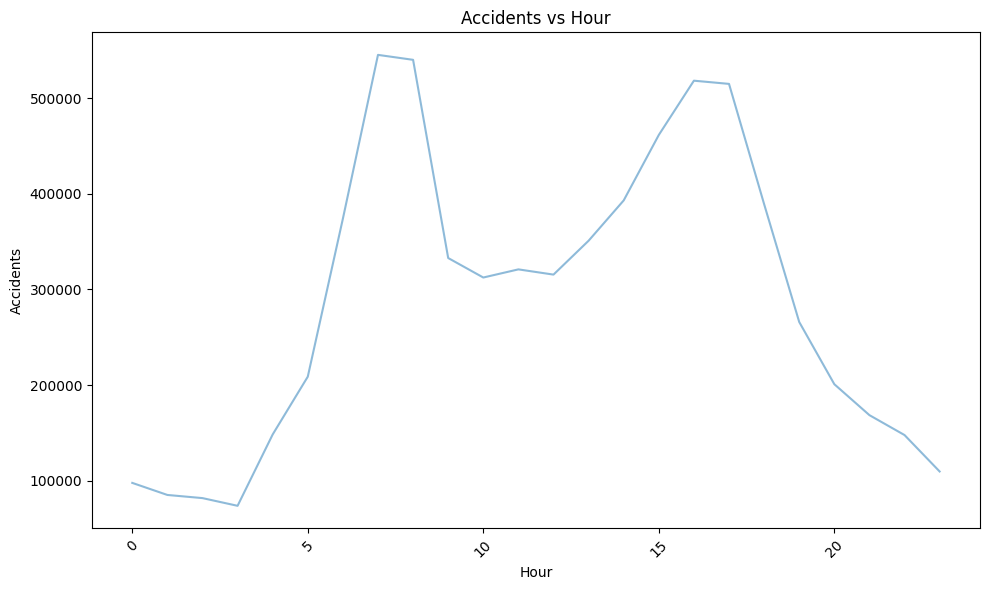

In [5]:
# mostrar
viz = Visualizer()

# Gráfico 1: Barras por condición meteorológica
viz.set_strategy(BarChartStrategy(x='Weather_Condition', top_n=15))
viz.render(df)

# Gráfico 2: Línea de accidentes por hora
accidents_per_hour = df['Hour'].value_counts().sort_index()
df_hourly = pd.DataFrame({'Hour': accidents_per_hour.index, 'Accidents': accidents_per_hour.values})

viz.set_strategy(LineChartStrategy(x='Hour', y='Accidents'))
viz.render(df_hourly)
